<a href="https://colab.research.google.com/github/Ryan-spec/Portfolio-Projects/blob/master/2020_Apple_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Closing Stock Price Prediction Using RNN and LSTM

In [1]:
# Using Machine Learning Techniques we will attempt to predict the future closing price of Apple Inc. using the closing price from the last 60 days.

In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
from pandas.util.testing import assert_frame_equal

In [4]:
# Get the stock quote

df = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01', end='2020-06-29')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-06-23,372.380005,362.269989,364.000000,366.529999,53038900.0,366.529999
2020-06-24,368.790009,358.519989,365.000000,360.059998,48155800.0,360.059998
2020-06-25,365.000000,357.570007,360.700012,364.839996,34380600.0,364.839996


In [5]:
# Get the number of rows and columns of the dataset
df.shape

(2136, 6)

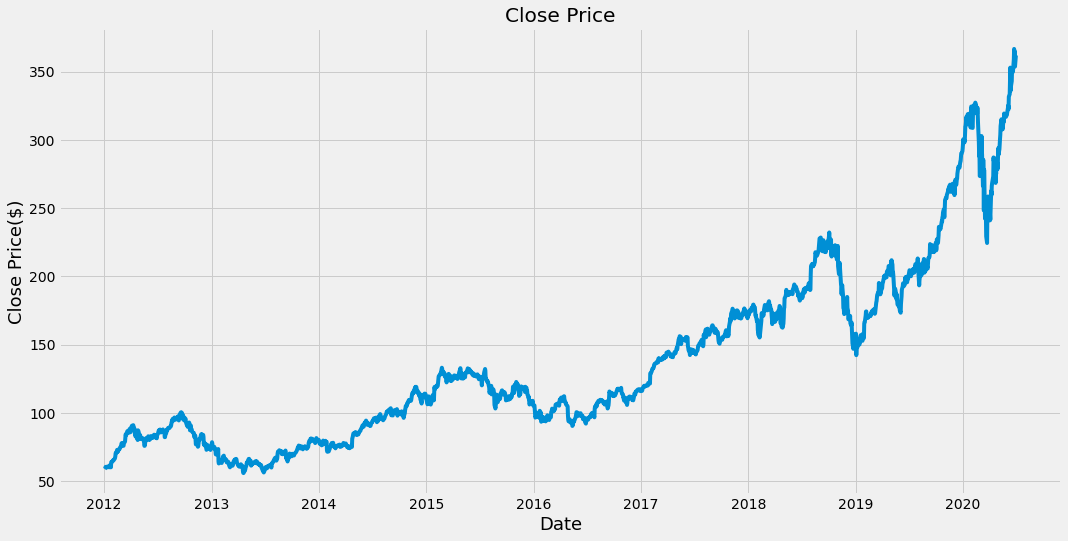

In [7]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price($)', fontsize=18)
plt.show()

In [8]:
# Create a new dataframe with only the "Close" column
close_data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = close_data.values

# Get the number of rows 
training_data_len = math.ceil(len(dataset) * .8)

# Print the training data length
training_data_len

1709

In [9]:
# Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00951645],
       [0.01053246],
       [0.01264263],
       ...,
       [0.99456136],
       [0.95848621],
       [0.98471391]])

In [12]:
# Create the training dataset

# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]

# Split the data into train and test data
x_train= []
y_train= []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()



[array([0.00951645, 0.01053246, 0.01264263, 0.01465166, 0.01434364,
       0.01503783, 0.01472061, 0.01418732, 0.01346096, 0.01570904,
       0.01773646, 0.01711123, 0.01368622, 0.01695491, 0.01373679,
       0.02580476, 0.0248715 , 0.0260898 , 0.02872405, 0.03031932,
       0.030186  , 0.02969409, 0.03179047, 0.03376271, 0.03599702,
       0.03960592, 0.0471869 , 0.04730183, 0.05152218, 0.05467593,
       0.04925568, 0.05134287, 0.0513015 , 0.0571539 , 0.05632177,
       0.05786186, 0.06062945, 0.06216957, 0.06660598, 0.06983791,
       0.07077114, 0.07109757, 0.06557159, 0.06423835, 0.06443605,
       0.06963101, 0.07109297, 0.07423292, 0.08163462, 0.09150967,
       0.08966154, 0.08966613, 0.09680578, 0.09904007, 0.0974494 ,
       0.09599666, 0.09448414, 0.09950899, 0.102957  , 0.10440056])]
[0.10083302902752131]

[array([0.00951645, 0.01053246, 0.01264263, 0.01465166, 0.01434364,
       0.01503783, 0.01472061, 0.01418732, 0.01346096, 0.01570904,
       0.01773646, 0.01711123, 0.01

In [13]:
# Convert the train and test values to numpy arrays to build the LSTM module
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1649, 60, 1)

In [18]:
# Build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(32, input_shape=(16,)))
model.add(Dense(1))

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1649/1649 [==============================] - 66s 40ms/step - loss: 4.7856e-04


In [21]:
# Create the test dataset
test_data = scaled_data[training_data_len - 60: , :]

# Create the x_test and y_test datasets
x_test= []
y_test= dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i,0])

In [22]:
# Convert the values to a numpy.array
x_test = np.array(x_test)


In [23]:
# Reshape the data into a three dimensional shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [24]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) 

In [25]:
# Get the RMSE for the model
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.806124291877836

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


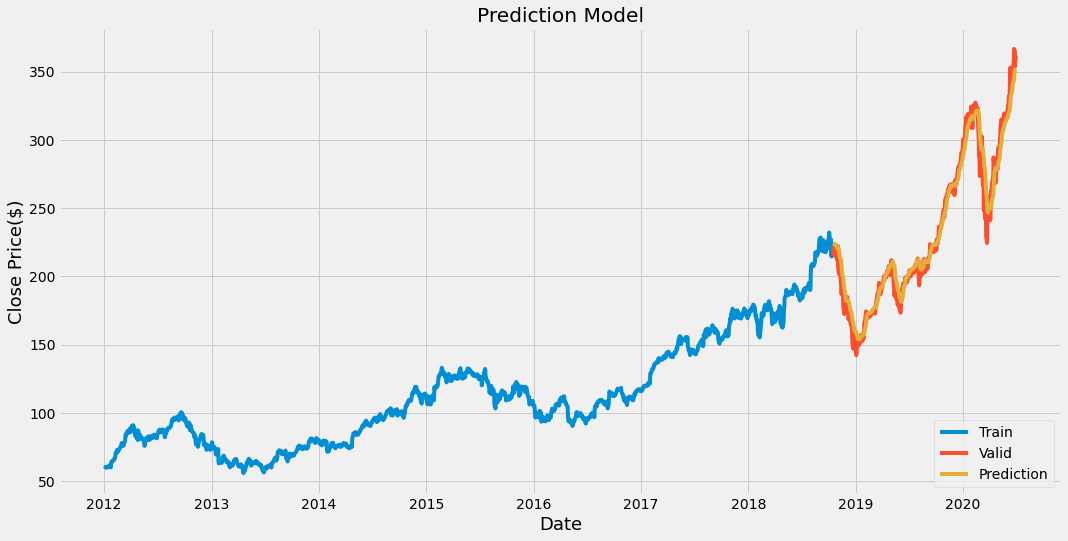

In [28]:
# Plot the data
train = close_data [:training_data_len]
valid = close_data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Prediction'], loc='lower right')
plt.show()


In [29]:
# Show the actual price and the predicted price
valid

,Close,Predictions
Date,,
2018-10-17,221.190002,224.241211
2018-10-18,216.020004,224.137039
2018-10-19,219.309998,223.505310
2018-10-22,220.649994,223.150620
2018-10-23,222.729996,223.110916
...,...,...
2020-06-23,366.529999,344.804535
2020-06-24,360.059998,347.691345
2020-06-25,364.839996,349.725708


The Model has proven to be quite exceptional in its prediction with an accuracy or RMSE of 0.8.